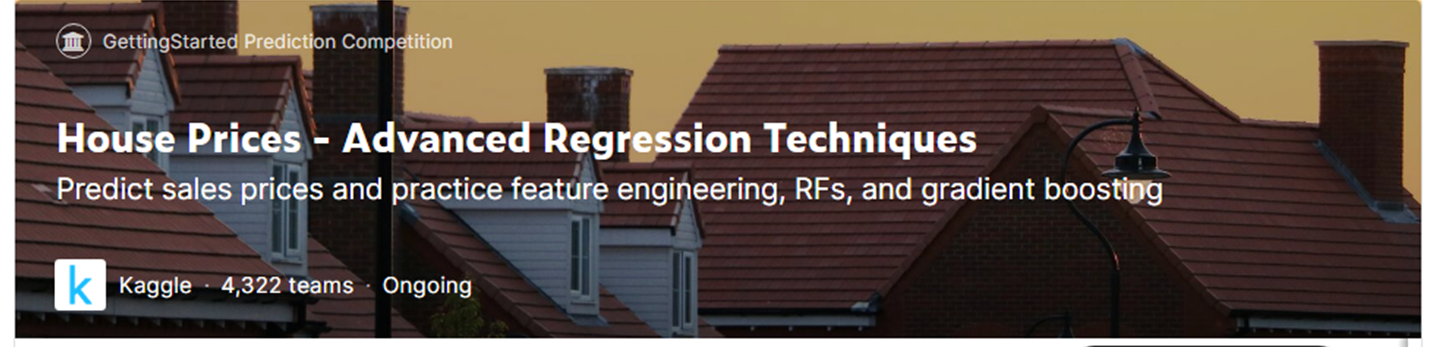

In [ ]:
# importar bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
 

In [ ]:
# Importar os dados
train = pd.read_csv("House_train.csv")
test = pd.read_csv("House_test.csv")

In [ ]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

In [ ]:
train.head().T

In [ ]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
train.SalePrice.describe()

In [ ]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

In [ ]:
import numpy as np
train['target']  = np.log(train.SalePrice)

In [ ]:
train.info()

In [ ]:
train.SalePrice.describe()

In [ ]:
train.target.describe()

In [ ]:
print ("Skew is:", train.target.skew())
plt.hist(train.target, color='red')
plt.show()

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

In [ ]:
corr = numeric_features.corr()
corr

In [ ]:
numeric_features.describe().T

In [ ]:
print (corr['SalePrice'].sort_values(ascending=False)[:20], '\n')

In [ ]:
print (corr['SalePrice'].sort_values(ascending=False)[-15:])

Para não termos que trabalhar as variáveis categóricas aqui, vou eliminar todas as colunas do tipo object e ficar apenas com as variáveis numéricas.

Na sequência, vou separar entre o DataFrame entre as variáveis X e y e dividir o dataset entre conjuntos de treino e teste.

Por último, vou usar a classe SimpleImputer() para lidar rapidamente com os valores ausentes do dataset.

In [ ]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

In [ ]:
quality_pivot

In [ ]:
sns.boxplot(x='OverallQual', y='target', data=train)
plt.title('Distribuição de target por OverallQual')
plt.show()

In [ ]:
plt.scatter(x=train['GrLivArea'], y=train.target)
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.show()

In [ ]:
train = train[train['GrLivArea'] < 5000]

In [ ]:
sns.boxplot(x='GarageCars', y='GarageArea', data=train)
plt.title('Distribuição de GarageCars por GarageArea')
plt.show()

In [ ]:
plt.scatter(x=train['GarageArea'], y=train.target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [ ]:
# separar entre as variáveis X e y
y = train['target']
X = train.drop(['SalePrice','target','Id','MSSubClass','MoSold','YrSold','YearBuilt','YearRemodAdd'], axis=1).select_dtypes(exclude=['object'])


In [ ]:
y

In [ ]:
X

In [ ]:
# dividir entre conjuntos de treino e teste
X_train, X_test, y_train, y_test= train_test_split(X.values, y.values, test_size=0.2)


In [ ]:
# lidar com os valores ausentes
df_imputer = SimpleImputer()


In [ ]:
df_imputer

In [ ]:
X_train = df_imputer.fit_transform(X_train)
X_test = df_imputer.transform(X_test)

In [ ]:
X_train

Implementando um modelo de XGBoost com Python - Dados preparados

Utilizando o  XGBRegressor()

Métrica de desempenho utilizando o erro médio absoluto 

### Primeira  opção de modelo

In [ ]:
# instanciar o modelo XGBoost
model = XGBRegressor()


In [ ]:
# chamar o fit para o modelo
model.fit(X_train, y_train, verbose=False)


In [ ]:
# fazer previsões em cima do dataset de teste
predictions = model.predict(X_test)
print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, y_test)))

### Segunda  opção de modelo

In [ ]:
# XGBoostRegressor

from xgboost import XGBRegressor

other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb = XGBRegressor(**other_params)


In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
xgb_prediction = xgb.predict(X_test)

In [ ]:
# fazer previsões em cima do dataset de teste
predictions = xgb.predict(X_test)
print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, y_test)))

In [ ]:
### Terceira opção de modelo

In [ ]:
from sklearn.model_selection import GridSearchCV

cv_params = {'n_estimators': [400, 500, 600, 700, 800]}

xgb = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)


In [ ]:
xgb.fit(X_train, y_train)


In [ ]:
xgb_prediction = xgb.predict(X_test)

### Quarta Opção de Modelo CatBoostRegressor

In [ ]:
# CatBoostRegressor
 
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat = GridSearchCV(estimator=cat, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)


In [ ]:
cat.fit(X_train, y_train)
cat_prediction = cat.predict(X_test)


In [ ]:
np.sqrt(mean_squared_error((y_test), xgb.predict(X_test))) 

In [ ]:
# CatBoostRegressor
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat = GridSearchCV(estimator=cat, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
cat.fit(X_train, y_train)
cat_prediction = cat.predict(X_test)

In [ ]:
# cat 

np.sqrt(mean_squared_error((y_test), cat.predict(X_test)))  

Parameter Tunning: ajustando parâmetros do XGBoost